In [ ]:
# Análise de Classificação de Diabetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Configuração para melhor visualização
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("="*60)
print("ANÁLISE DE DADOS - CLASSIFICAÇÃO DE DIABETES")
print("="*60)

# Carregando os dados
dados_originais = pd.read_csv("diabetes_dataset.csv", sep=",")

print("\n1.1 - Primeiros 5 resultados:")
print(dados_originais.head())

print("\n1.2 - Informações do dataset:")
print(f"Shape: {dados_originais.shape}")
print(f"Colunas: {list(dados_originais.columns)}")

print("\n1.3 - Informações sobre as variáveis target:")
print("diagnosed_diabetes:")
print(dados_originais['diagnosed_diabetes'].value_counts())
print("\ndiabetes_stage:")
print(dados_originais['diabetes_stage'].value_counts())

ANÁLISE DE DADOS - CLASSIFICAÇÃO DE DIABETES

1.1 - Primeiros 5 resultados:
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1               


2.1 - Análise de valores ausentes:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gluc

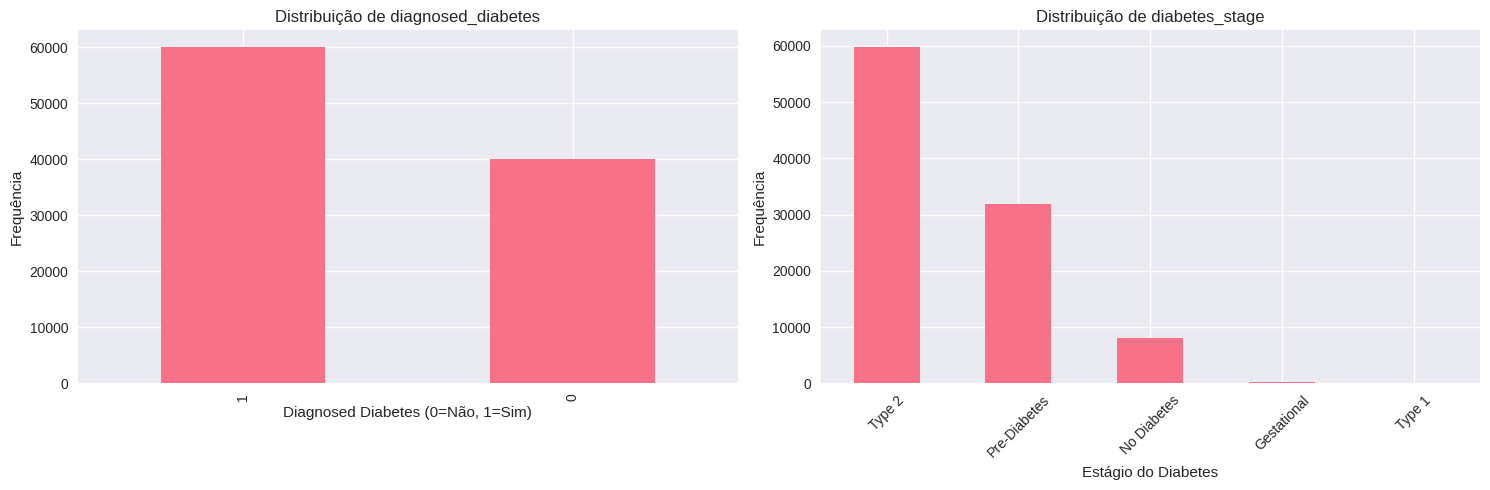

In [4]:
# 2. ANÁLISE EXPLORATÓRIA DE DADOS

print("\n2.1 - Análise de valores ausentes:")
print(dados_originais.isnull().sum())

print("\n2.2 - Tipos de dados:")
print(dados_originais.dtypes)

print("\n2.3 - Estatísticas descritivas das variáveis numéricas:")
numeric_cols = dados_originais.select_dtypes(include=[np.number]).columns
print(dados_originais[numeric_cols].describe())

# Visualização da distribuição das variáveis target
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# diagnosed_diabetes
dados_originais['diagnosed_diabetes'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribuição de diagnosed_diabetes')
axes[0].set_xlabel('Diagnosed Diabetes (0=Não, 1=Sim)')
axes[0].set_ylabel('Frequência')

# diabetes_stage
dados_originais['diabetes_stage'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribuição de diabetes_stage')
axes[1].set_xlabel('Estágio do Diabetes')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [5]:
# 3. PRÉ-PROCESSAMENTO DE DADOS

# Separando features e target
# Usando diagnosed_diabetes como target principal (classificação binária)
X = dados_originais.drop(columns=["diagnosed_diabetes", "diabetes_stage"])
y = dados_originais["diagnosed_diabetes"]

print("3.1 - Informações sobre as features:")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"Distribuição do target: {y.value_counts()}")

X = X.drop(columns=["education_level", "income_level", "employment_status"])

# Identificando colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColunas categóricas: {categorical_cols}")
print(f"Colunas numéricas: {numerical_cols}")

# Split inicial dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n3.2 - Split dos dados:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: {y_train.value_counts()}")
print(f"y_test distribution: {y_test.value_counts()}")


3.1 - Informações sobre as features:
Shape X: (100000, 29)
Shape y: (100000,)
Distribuição do target: diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

Colunas categóricas: ['gender', 'ethnicity', 'smoking_status']
Colunas numéricas: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']

3.2 - Split dos dados:
X_train shape: (80000, 26)
X_test shape: (20000, 26)
y_train distribution: diagnosed_diabetes
1    47998
0    32002
Name: count, dtype: int64
y_test distribution: diagnosed_diabetes
1    12000
0     8000
Name: count, dtype: int64


In [6]:
# 4. PREPARAÇÃO DOS DADOS COM DIFERENTES ENCODERS E SCALERS

# 4.1 - DADOS COM LABEL ENCODER
print("4.1 - Preparando dados com Label Encoder...")

# Criando cópia para Label Encoder
X_LE = X.copy()
y_LE = y.copy()

# Aplicando Label Encoder nas colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_LE[col] = le.fit_transform(X_LE[col].astype(str))
    label_encoders[col] = le

# Split dos dados com Label Encoder
X_train_LE, X_test_LE, y_train_LE, y_test_LE = train_test_split(
    X_LE, y_LE, test_size=0.2, random_state=42, stratify=y_LE
)

# 4.2 - DADOS COM LABEL ENCODER + STANDARD SCALER
print("4.2 - Preparando dados com Label Encoder + Standard Scaler...")

scaler_std = StandardScaler()
X_LE_std = scaler_std.fit_transform(X_LE)
X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std = train_test_split(
    X_LE_std, y_LE, test_size=0.2, random_state=42, stratify=y_LE
)

# 4.3 - DADOS COM LABEL ENCODER + MIN MAX SCALER
print("4.3 - Preparando dados com Label Encoder + Min Max Scaler...")

scaler_minmax = MinMaxScaler()
X_LE_minmax = scaler_minmax.fit_transform(X_LE)
X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax = train_test_split(
    X_LE_minmax, y_LE, test_size=0.2, random_state=42, stratify=y_LE
)

# 4.4 - DADOS COM ONE HOT ENCODER + STANDARD SCALER
print("4.4 - Preparando dados com One Hot Encoder + Standard Scaler...")

# Pipeline para One Hot Encoder + Standard Scaler
num_pipeline_std = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline_ohe_std = ColumnTransformer([
    ("num", num_pipeline_std, numerical_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

X_OHE_std = full_pipeline_ohe_std.fit_transform(X)
X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std = train_test_split(
    X_OHE_std, y, test_size=0.2, random_state=42, stratify=y
)

# 4.5 - DADOS COM ONE HOT ENCODER + MIN MAX SCALER
print("4.5 - Preparando dados com One Hot Encoder + Min Max Scaler...")

# Pipeline para One Hot Encoder + Min Max Scaler
num_pipeline_minmax = Pipeline([
    ("minmax_scaler", MinMaxScaler())
])

full_pipeline_ohe_minmax = ColumnTransformer([
    ("num", num_pipeline_minmax, numerical_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

X_OHE_minmax = full_pipeline_ohe_minmax.fit_transform(X)
X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax = train_test_split(
    X_OHE_minmax, y, test_size=0.2, random_state=42, stratify=y
)

print("Pré-processamento concluído!")


4.1 - Preparando dados com Label Encoder...
4.2 - Preparando dados com Label Encoder + Standard Scaler...
4.3 - Preparando dados com Label Encoder + Min Max Scaler...
4.4 - Preparando dados com One Hot Encoder + Standard Scaler...
4.5 - Preparando dados com One Hot Encoder + Min Max Scaler...
Pré-processamento concluído!


In [7]:
# 5. OVERSAMPLING COM SMOTE

print("5.1 - Aplicando SMOTE para balanceamento dos dados...")

# Aplicando SMOTE nos dados com Label Encoder
smote = SMOTE(random_state=42)

# Label Encoder + SMOTE
X_LE_os, y_LE_os = smote.fit_resample(X_LE, y_LE)
X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os = train_test_split(
    X_LE_os, y_LE_os, test_size=0.2, random_state=42, stratify=y_LE_os
)

# Label Encoder + Standard Scaler + SMOTE
X_LE_std_os, y_LE_std_os = smote.fit_resample(X_LE_std, y_LE)
X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os = train_test_split(
    X_LE_std_os, y_LE_std_os, test_size=0.2, random_state=42, stratify=y_LE_std_os
)

# Label Encoder + Min Max Scaler + SMOTE
X_LE_minmax_os, y_LE_minmax_os = smote.fit_resample(X_LE_minmax, y_LE)
X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os = train_test_split(
    X_LE_minmax_os, y_LE_minmax_os, test_size=0.2, random_state=42, stratify=y_LE_minmax_os
)

# One Hot Encoder + Standard Scaler + SMOTE
X_OHE_std_os, y_OHE_std_os = smote.fit_resample(X_OHE_std, y)
X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os = train_test_split(
    X_OHE_std_os, y_OHE_std_os, test_size=0.2, random_state=42, stratify=y_OHE_std_os
)

# One Hot Encoder + Min Max Scaler + SMOTE
X_OHE_minmax_os, y_OHE_minmax_os = smote.fit_resample(X_OHE_minmax, y)
X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os = train_test_split(
    X_OHE_minmax_os, y_OHE_minmax_os, test_size=0.2, random_state=42, stratify=y_OHE_minmax_os
)

print("Distribuição original vs após SMOTE:")
print(f"Original: {y.value_counts()}")
print(f"Após SMOTE (LE): {y_LE_os.value_counts()}")
print(f"Após SMOTE (OHE): {y_OHE_std_os.value_counts()}")


5.1 - Aplicando SMOTE para balanceamento dos dados...
Distribuição original vs após SMOTE:
Original: diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64
Após SMOTE (LE): diagnosed_diabetes
1    59998
0    59998
Name: count, dtype: int64
Após SMOTE (OHE): diagnosed_diabetes
1    59998
0    59998
Name: count, dtype: int64


In [8]:
# 6. FUNÇÕES PARA OTIMIZAÇÃO DE HIPERPARÂMETROS

def check_K_number(modelo, x_train, x_test, y_train, y_test):
    """Função para encontrar o melhor K para KNN"""
    best_k = 0
    best_mean_error = 100

    # Testando K de 3 a 8
    for i in range(3, 9):
        model = modelo(n_neighbors=i)
        model.fit(x_train, y_train)
        pred_i = model.predict(x_test)
        error = np.mean(pred_i != y_test)

        if error < best_mean_error:
            best_mean_error = error
            best_k = i

    return best_k

def check_dt_max_depth(modelo, x_train, x_test, y_train, y_test):
    """Função para encontrar o melhor max_depth para Decision Tree"""
    best_max_depth = 0
    best_mean_error = 100

    for i in range(3, 9):
        model = modelo(max_depth=i, random_state=7, criterion='gini')
        model.fit(x_train, y_train)
        pred_i = model.predict(x_test)
        error = np.mean(pred_i != y_test)

        if error < best_mean_error:
            best_mean_error = error
            best_max_depth = i

    return best_max_depth

def check_rf_max_depth(modelo, x_train, x_test, y_train, y_test):
    """Função para encontrar o melhor max_depth para Random Forest"""
    best_max_depth = 0
    best_mean_error = 100

    for i in range(3, 9):
        model = modelo(max_depth=i, random_state=7, criterion='entropy', n_estimators=100)
        model.fit(x_train, y_train)
        pred_i = model.predict(x_test)
        error = np.mean(pred_i != y_test)

        if error < best_mean_error:
            best_mean_error = error
            best_max_depth = i

    return best_max_depth

print("Funções de otimização de hiperparâmetros criadas!")


Funções de otimização de hiperparâmetros criadas!


In [9]:
# 7. MODELOS DE CLASSIFICAÇÃO - KNN

def run_knn_classifier_experiment(model_name, x_train, x_test, y_train, y_test, encoder_name, oversampling=False):
    """Função para executar experimentos com KNN"""
    best_k = check_K_number(KNeighborsClassifier, x_train, x_test, y_train, y_test)
    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    return {
        'k': best_k,
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'encoder_name': encoder_name,
        'oversampling': oversampling
    }

print("7.1 - Executando experimentos com KNN...")

# Executando experimentos com KNN
knn_experiments = {}

# SOMENTE LABEL ENCODER
knn_experiments['LE'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE, X_test_LE, y_train_LE, y_test_LE,
    'Label Encoder', oversampling=False
)

# SOMENTE LABEL ENCODER E OVERSAMPLING
knn_experiments['LE_os'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os,
    'Label Encoder', oversampling=True
)

# COM LABEL ENCODER E STANDARD SCALER
knn_experiments['LE_std'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std,
    'Label Encoder + Standard Scaler', oversampling=False
)

# COM LABEL ENCODER E STANDARD SCALER E OVERSAMPLING
knn_experiments['LE_std_os'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os,
    'Label Encoder + Standard Scaler', oversampling=True
)

# COM LABEL ENCODER E MIN MAX SCALER
knn_experiments['LE_minmax'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax,
    'Label Encoder + Min Max Scaler', oversampling=False
)

# COM LABEL ENCODER E MIN MAX SCALER E OVERSAMPLING
knn_experiments['LE_minmax_os'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os,
    'Label Encoder + Min Max Scaler', oversampling=True
)

# COM ONE HOT ENCODER E STANDARD SCALER
knn_experiments['OHE_std'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std,
    'One Hot Encoder + Standard Scaler', oversampling=False
)

# COM ONE HOT ENCODER E STANDARD SCALER E OVERSAMPLING
knn_experiments['OHE_std_os'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os,
    'One Hot Encoder + Standard Scaler', oversampling=True
)

# COM ONE HOT ENCODER E MIN MAX SCALER
knn_experiments['OHE_minmax'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax,
    'One Hot Encoder + Min Max Scaler', oversampling=False
)

# COM ONE HOT ENCODER E MIN MAX SCALER E OVERSAMPLING
knn_experiments['OHE_minmax_os'] = run_knn_classifier_experiment(
    'KNeighborsClassifier', X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os,
    'One Hot Encoder + Min Max Scaler', oversampling=True
)

print("\n" + "=" * 100)
print("TABELA DE RESULTADOS - KNeighborsClassifier")
print("=" * 100)
print(f"{'ENCODER':<50} {'OVERSAMPLING':<15} {'K':<5} {'ACCURACY':<10} {'PRECISION':<10} {'RECALL':<10} {'F1':<10}")
print("-" * 100)

for key, experiment in knn_experiments.items():
    oversampling_text = 'Sim' if experiment['oversampling'] else 'Não'
    print(f"{experiment['encoder_name']:<50} {oversampling_text:<15} {experiment['k']:<5} {experiment['accuracy']:.2f}%     {experiment['precision']:.2f}%     {experiment['recall']:.2f}%     {experiment['f1']:.2f}%")

print("=" * 100)


7.1 - Executando experimentos com KNN...

TABELA DE RESULTADOS - KNeighborsClassifier
ENCODER                                            OVERSAMPLING    K     ACCURACY   PRECISION  RECALL     F1        
----------------------------------------------------------------------------------------------------
Label Encoder                                      Não             8     82.23%     89.28%     79.99%     84.38%
Label Encoder                                      Sim             7     84.00%     90.11%     76.39%     82.69%
Label Encoder + Standard Scaler                    Não             8     82.45%     88.91%     80.83%     84.67%
Label Encoder + Standard Scaler                    Sim             7     83.77%     91.60%     74.36%     82.08%
Label Encoder + Min Max Scaler                     Não             8     80.63%     86.56%     80.17%     83.24%
Label Encoder + Min Max Scaler                     Sim             7     81.95%     89.56%     72.32%     80.02%
One Hot Encoder + 

In [10]:
# 8. MODELOS DE CLASSIFICAÇÃO - SVM

def run_svm_classifier_experiment(model_name, x_train, x_test, y_train, y_test, encoder_name, oversampling=False):
    """Função para executar experimentos com SVM"""
    model = Pipeline([("linear_svc", LinearSVC(C=1, random_state=42))])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    return {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'encoder_name': encoder_name,
        'oversampling': oversampling
    }

print("8.1 - Executando experimentos com SVM...")

# Executando experimentos com SVM
svm_experiments = {}

# SOMENTE LABEL ENCODER
svm_experiments['LE'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE, X_test_LE, y_train_LE, y_test_LE,
    'Label Encoder', oversampling=False
)

# SOMENTE LABEL ENCODER E OVERSAMPLING
svm_experiments['LE_os'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os,
    'Label Encoder', oversampling=True
)

# COM LABEL ENCODER E STANDARD SCALER
svm_experiments['LE_std'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std,
    'Label Encoder + Standard Scaler', oversampling=False
)

# COM LABEL ENCODER E STANDARD SCALER E OVERSAMPLING
svm_experiments['LE_std_os'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os,
    'Label Encoder + Standard Scaler', oversampling=True
)

# COM LABEL ENCODER E MIN MAX SCALER
svm_experiments['LE_minmax'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax,
    'Label Encoder + Min Max Scaler', oversampling=False
)

# COM LABEL ENCODER E MIN MAX SCALER E OVERSAMPLING
svm_experiments['LE_minmax_os'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os,
    'Label Encoder + Min Max Scaler', oversampling=True
)

# COM ONE HOT ENCODER E STANDARD SCALER
svm_experiments['OHE_std'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std,
    'One Hot Encoder + Standard Scaler', oversampling=False
)

# COM ONE HOT ENCODER E STANDARD SCALER E OVERSAMPLING
svm_experiments['OHE_std_os'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os,
    'One Hot Encoder + Standard Scaler', oversampling=True
)

# COM ONE HOT ENCODER E MIN MAX SCALER
svm_experiments['OHE_minmax'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax,
    'One Hot Encoder + Min Max Scaler', oversampling=False
)

# COM ONE HOT ENCODER E MIN MAX SCALER E OVERSAMPLING
svm_experiments['OHE_minmax_os'] = run_svm_classifier_experiment(
    'LinearSVC', X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os,
    'One Hot Encoder + Min Max Scaler', oversampling=True
)

print("\n" + "=" * 100)
print("TABELA DE RESULTADOS - LinearSVC")
print("=" * 100)
print(f"{'ENCODER':<50} {'OVERSAMPLING':<15} {'ACCURACY':<10} {'PRECISION':<10} {'RECALL':<10} {'F1':<10}")
print("-" * 100)

for key, experiment in svm_experiments.items():
    oversampling_text = 'Sim' if experiment['oversampling'] else 'Não'
    print(f"{experiment['encoder_name']:<50} {oversampling_text:<15} {experiment['accuracy']:.2f}%     {experiment['precision']:.2f}%     {experiment['recall']:.2f}%     {experiment['f1']:.2f}%")

print("=" * 100)


8.1 - Executando experimentos com SVM...

TABELA DE RESULTADOS - LinearSVC
ENCODER                                            OVERSAMPLING    ACCURACY   PRECISION  RECALL     F1        
----------------------------------------------------------------------------------------------------
Label Encoder                                      Não             85.67%     86.89%     89.64%     88.24%
Label Encoder                                      Sim             89.14%     90.25%     87.75%     88.98%
Label Encoder + Standard Scaler                    Não             85.68%     86.90%     89.64%     88.25%
Label Encoder + Standard Scaler                    Sim             89.32%     90.51%     87.85%     89.16%
Label Encoder + Min Max Scaler                     Não             85.66%     86.88%     89.64%     88.24%
Label Encoder + Min Max Scaler                     Sim             89.38%     90.59%     87.89%     89.22%
One Hot Encoder + Standard Scaler                  Não             85.7

In [11]:
# 9. MODELOS DE CLASSIFICAÇÃO - DECISION TREE

def run_decision_tree_experiment(model_name, x_train, x_test, y_train, y_test, encoder_name, oversampling=False):
    """Função para executar experimentos com Decision Tree"""
    best_max_depth = check_dt_max_depth(DecisionTreeClassifier, x_train, x_test, y_train, y_test)
    model = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth=best_max_depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    return {
        'max_depth': best_max_depth,
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'encoder_name': encoder_name,
        'oversampling': oversampling
    }

print("9.1 - Executando experimentos com Decision Tree...")

# Executando experimentos com Decision Tree
dt_experiments = {}

# SOMENTE LABEL ENCODER
dt_experiments['LE'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE, X_test_LE, y_train_LE, y_test_LE,
    'Label Encoder', oversampling=False
)

# SOMENTE LABEL ENCODER E OVERSAMPLING
dt_experiments['LE_os'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os,
    'Label Encoder', oversampling=True
)

# COM LABEL ENCODER E STANDARD SCALER
dt_experiments['LE_std'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std,
    'Label Encoder + Standard Scaler', oversampling=False
)

# COM LABEL ENCODER E STANDARD SCALER E OVERSAMPLING
dt_experiments['LE_std_os'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os,
    'Label Encoder + Standard Scaler', oversampling=True
)

# COM LABEL ENCODER E MIN MAX SCALER
dt_experiments['LE_minmax'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax,
    'Label Encoder + Min Max Scaler', oversampling=False
)

# COM LABEL ENCODER E MIN MAX SCALER E OVERSAMPLING
dt_experiments['LE_minmax_os'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os,
    'Label Encoder + Min Max Scaler', oversampling=True
)

# COM ONE HOT ENCODER E STANDARD SCALER
dt_experiments['OHE_std'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std,
    'One Hot Encoder + Standard Scaler', oversampling=False
)

# COM ONE HOT ENCODER E STANDARD SCALER E OVERSAMPLING
dt_experiments['OHE_std_os'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os,
    'One Hot Encoder + Standard Scaler', oversampling=True
)

# COM ONE HOT ENCODER E MIN MAX SCALER
dt_experiments['OHE_minmax'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax,
    'One Hot Encoder + Min Max Scaler', oversampling=False
)

# COM ONE HOT ENCODER E MIN MAX SCALER E OVERSAMPLING
dt_experiments['OHE_minmax_os'] = run_decision_tree_experiment(
    'DecisionTreeClassifier', X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os,
    'One Hot Encoder + Min Max Scaler', oversampling=True
)

print("\n" + "=" * 110)
print("TABELA DE RESULTADOS - DecisionTreeClassifier")
print("=" * 110)
print(f"{'ENCODER':<50} {'OVERSAMPLING':<15} {'MAX_DEPTH':<10} {'ACCURACY':<10} {'PRECISION':<10} {'RECALL':<10} {'F1':<10}")
print("-" * 110)

for key, experiment in dt_experiments.items():
    oversampling_text = 'Sim' if experiment['oversampling'] else 'Não'
    print(f"{experiment['encoder_name']:<50} {oversampling_text:<15} {experiment['max_depth']:<10} {experiment['accuracy']:.2f}%     {experiment['precision']:.2f}%     {experiment['recall']:.2f}%     {experiment['f1']:.2f}%")

print("=" * 110)


9.1 - Executando experimentos com Decision Tree...

TABELA DE RESULTADOS - DecisionTreeClassifier
ENCODER                                            OVERSAMPLING    MAX_DEPTH  ACCURACY   PRECISION  RECALL     F1        
--------------------------------------------------------------------------------------------------------------
Label Encoder                                      Não             3          91.99%     100.00%     86.65%     92.85%
Label Encoder                                      Sim             3          93.45%     100.00%     86.90%     92.99%
Label Encoder + Standard Scaler                    Não             3          91.99%     100.00%     86.65%     92.85%
Label Encoder + Standard Scaler                    Sim             3          93.45%     100.00%     86.90%     92.99%
Label Encoder + Min Max Scaler                     Não             3          91.99%     100.00%     86.65%     92.85%
Label Encoder + Min Max Scaler                     Sim             3      

In [12]:
# 10. MODELOS DE CLASSIFICAÇÃO - RANDOM FOREST

def run_random_forest_experiment(model_name, x_train, x_test, y_train, y_test, encoder_name, oversampling=False):
    """Função para executar experimentos com Random Forest"""
    best_max_depth = check_rf_max_depth(RandomForestClassifier, x_train, x_test, y_train, y_test)
    model = RandomForestClassifier(max_depth=best_max_depth, random_state=7, criterion='entropy', n_estimators=100)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    return {
        'max_depth': best_max_depth,
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'encoder_name': encoder_name,
        'oversampling': oversampling
    }

print("10.1 - Executando experimentos com Random Forest...")

# Executando experimentos com Random Forest
rf_experiments = {}

# SOMENTE LABEL ENCODER
rf_experiments['LE'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE, X_test_LE, y_train_LE, y_test_LE,
    'Label Encoder', oversampling=False
)

# SOMENTE LABEL ENCODER E OVERSAMPLING
rf_experiments['LE_os'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os,
    'Label Encoder', oversampling=True
)

# COM LABEL ENCODER E STANDARD SCALER
rf_experiments['LE_std'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std,
    'Label Encoder + Standard Scaler', oversampling=False
)

# COM LABEL ENCODER E STANDARD SCALER E OVERSAMPLING
rf_experiments['LE_std_os'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os,
    'Label Encoder + Standard Scaler', oversampling=True
)

# COM LABEL ENCODER E MIN MAX SCALER
rf_experiments['LE_minmax'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax,
    'Label Encoder + Min Max Scaler', oversampling=False
)

# COM LABEL ENCODER E MIN MAX SCALER E OVERSAMPLING
rf_experiments['LE_minmax_os'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os,
    'Label Encoder + Min Max Scaler', oversampling=True
)

# COM ONE HOT ENCODER E STANDARD SCALER
rf_experiments['OHE_std'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std,
    'One Hot Encoder + Standard Scaler', oversampling=False
)

# COM ONE HOT ENCODER E STANDARD SCALER E OVERSAMPLING
rf_experiments['OHE_std_os'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os,
    'One Hot Encoder + Standard Scaler', oversampling=True
)

# COM ONE HOT ENCODER E MIN MAX SCALER
rf_experiments['OHE_minmax'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax,
    'One Hot Encoder + Min Max Scaler', oversampling=False
)

# COM ONE HOT ENCODER E MIN MAX SCALER E OVERSAMPLING
rf_experiments['OHE_minmax_os'] = run_random_forest_experiment(
    'RandomForestClassifier', X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os,
    'One Hot Encoder + Min Max Scaler', oversampling=True
)

print("\n" + "=" * 120)
print("TABELA DE RESULTADOS - RandomForestClassifier")
print("=" * 120)
print(f"{'ENCODER':<50} {'OVERSAMPLING':<15} {'MAX_DEPTH':<10} {'ACCURACY':<10} {'PRECISION':<10} {'RECALL':<10} {'F1':<10}")
print("-" * 120)

for key, experiment in rf_experiments.items():
    oversampling_text = 'Sim' if experiment['oversampling'] else 'Não'
    print(f"{experiment['encoder_name']:<50} {oversampling_text:<15} {experiment['max_depth']:<10} {experiment['accuracy']:.2f}%     {experiment['precision']:.2f}%     {experiment['recall']:.2f}%     {experiment['f1']:.2f}%")

print("=" * 120)


10.1 - Executando experimentos com Random Forest...

TABELA DE RESULTADOS - RandomForestClassifier
ENCODER                                            OVERSAMPLING    MAX_DEPTH  ACCURACY   PRECISION  RECALL     F1        
------------------------------------------------------------------------------------------------------------------------
Label Encoder                                      Não             5          92.00%     99.94%     86.71%     92.86%
Label Encoder                                      Sim             7          93.45%     100.00%     86.90%     92.99%
Label Encoder + Standard Scaler                    Não             5          92.00%     99.94%     86.71%     92.86%
Label Encoder + Standard Scaler                    Sim             6          93.45%     100.00%     86.90%     92.99%
Label Encoder + Min Max Scaler                     Não             5          92.00%     99.94%     86.71%     92.86%
Label Encoder + Min Max Scaler                     Sim            

In [13]:
# 11. MODELOS DE CLASSIFICAÇÃO - LOGISTIC REGRESSION

def run_logistic_regression_experiment(model_name, x_train, x_test, y_train, y_test, encoder_name, oversampling=False):
    """Função para executar experimentos com Logistic Regression"""
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    return {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'encoder_name': encoder_name,
        'oversampling': oversampling
    }

print("11.1 - Executando experimentos com Logistic Regression...")

# Executando experimentos com Logistic Regression
lr_experiments = {}

# SOMENTE LABEL ENCODER
lr_experiments['LE'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE, X_test_LE, y_train_LE, y_test_LE,
    'Label Encoder', oversampling=False
)

# SOMENTE LABEL ENCODER E OVERSAMPLING
lr_experiments['LE_os'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE_os, X_test_LE_os, y_train_LE_os, y_test_LE_os,
    'Label Encoder', oversampling=True
)

# COM LABEL ENCODER E STANDARD SCALER
lr_experiments['LE_std'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE_std, X_test_LE_std, y_train_LE_std, y_test_LE_std,
    'Label Encoder + Standard Scaler', oversampling=False
)

# COM LABEL ENCODER E STANDARD SCALER E OVERSAMPLING
lr_experiments['LE_std_os'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE_std_os, X_test_LE_std_os, y_train_LE_std_os, y_test_LE_std_os,
    'Label Encoder + Standard Scaler', oversampling=True
)

# COM LABEL ENCODER E MIN MAX SCALER
lr_experiments['LE_minmax'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE_minmax, X_test_LE_minmax, y_train_LE_minmax, y_test_LE_minmax,
    'Label Encoder + Min Max Scaler', oversampling=False
)

# COM LABEL ENCODER E MIN MAX SCALER E OVERSAMPLING
lr_experiments['LE_minmax_os'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_LE_minmax_os, X_test_LE_minmax_os, y_train_LE_minmax_os, y_test_LE_minmax_os,
    'Label Encoder + Min Max Scaler', oversampling=True
)

# COM ONE HOT ENCODER E STANDARD SCALER
lr_experiments['OHE_std'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_OHE_std, X_test_OHE_std, y_train_OHE_std, y_test_OHE_std,
    'One Hot Encoder + Standard Scaler', oversampling=False
)

# COM ONE HOT ENCODER E STANDARD SCALER E OVERSAMPLING
lr_experiments['OHE_std_os'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_OHE_std_os, X_test_OHE_std_os, y_train_OHE_std_os, y_test_OHE_std_os,
    'One Hot Encoder + Standard Scaler', oversampling=True
)

# COM ONE HOT ENCODER E MIN MAX SCALER
lr_experiments['OHE_minmax'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_OHE_minmax, X_test_OHE_minmax, y_train_OHE_minmax, y_test_OHE_minmax,
    'One Hot Encoder + Min Max Scaler', oversampling=False
)

# COM ONE HOT ENCODER E MIN MAX SCALER E OVERSAMPLING
lr_experiments['OHE_minmax_os'] = run_logistic_regression_experiment(
    'LogisticRegression', X_train_OHE_minmax_os, X_test_OHE_minmax_os, y_train_OHE_minmax_os, y_test_OHE_minmax_os,
    'One Hot Encoder + Min Max Scaler', oversampling=True
)

print("\n" + "=" * 100)
print("TABELA DE RESULTADOS - LogisticRegression")
print("=" * 100)
print(f"{'ENCODER':<50} {'OVERSAMPLING':<15} {'ACCURACY':<10} {'PRECISION':<10} {'RECALL':<10} {'F1':<10}")
print("-" * 100)

for key, experiment in lr_experiments.items():
    oversampling_text = 'Sim' if experiment['oversampling'] else 'Não'
    print(f"{experiment['encoder_name']:<50} {oversampling_text:<15} {experiment['accuracy']:.2f}%     {experiment['precision']:.2f}%     {experiment['recall']:.2f}%     {experiment['f1']:.2f}%")

print("=" * 100)


11.1 - Executando experimentos com Logistic Regression...

TABELA DE RESULTADOS - LogisticRegression
ENCODER                                            OVERSAMPLING    ACCURACY   PRECISION  RECALL     F1        
----------------------------------------------------------------------------------------------------
Label Encoder                                      Não             83.95%     85.35%     88.44%     86.87%
Label Encoder                                      Sim             85.10%     85.62%     84.37%     84.99%
Label Encoder + Standard Scaler                    Não             86.03%     87.48%     89.53%     88.50%
Label Encoder + Standard Scaler                    Sim             89.36%     90.60%     87.84%     89.20%
Label Encoder + Min Max Scaler                     Não             85.91%     87.35%     89.47%     88.39%
Label Encoder + Min Max Scaler                     Sim             89.34%     90.59%     87.80%     89.17%
One Hot Encoder + Standard Scaler            

In [14]:
# 12. ANÁLISE COMPARATIVA E VISUALIZAÇÕES

print("12.1 - Criando análise comparativa dos modelos...")

# Coletando todos os resultados em um DataFrame para análise
import pandas as pd

# Preparando dados para comparação
all_results = []

# KNN Results
for key, exp in knn_experiments.items():
    all_results.append({
        'Model': 'KNN',
        'Encoder': exp['encoder_name'],
        'Oversampling': exp['oversampling'],
        'Accuracy': exp['accuracy'],
        'Precision': exp['precision'],
        'Recall': exp['recall'],
        'F1': exp['f1'],
        'Hyperparameter': f"K={exp['k']}"
    })

# SVM Results
for key, exp in svm_experiments.items():
    all_results.append({
        'Model': 'SVM',
        'Encoder': exp['encoder_name'],
        'Oversampling': exp['oversampling'],
        'Accuracy': exp['accuracy'],
        'Precision': exp['precision'],
        'Recall': exp['recall'],
        'F1': exp['f1'],
        'Hyperparameter': 'C=1'
    })

# Decision Tree Results
for key, exp in dt_experiments.items():
    all_results.append({
        'Model': 'Decision Tree',
        'Encoder': exp['encoder_name'],
        'Oversampling': exp['oversampling'],
        'Accuracy': exp['accuracy'],
        'Precision': exp['precision'],
        'Recall': exp['recall'],
        'F1': exp['f1'],
        'Hyperparameter': f"max_depth={exp['max_depth']}"
    })

# Random Forest Results
for key, exp in rf_experiments.items():
    all_results.append({
        'Model': 'Random Forest',
        'Encoder': exp['encoder_name'],
        'Oversampling': exp['oversampling'],
        'Accuracy': exp['accuracy'],
        'Precision': exp['precision'],
        'Recall': exp['recall'],
        'F1': exp['f1'],
        'Hyperparameter': f"max_depth={exp['max_depth']}"
    })

# Logistic Regression Results
for key, exp in lr_experiments.items():
    all_results.append({
        'Model': 'Logistic Regression',
        'Encoder': exp['encoder_name'],
        'Oversampling': exp['oversampling'],
        'Accuracy': exp['accuracy'],
        'Precision': exp['precision'],
        'Recall': exp['recall'],
        'F1': exp['f1'],
        'Hyperparameter': 'max_iter=1000'
    })

# Criando DataFrame
results_df = pd.DataFrame(all_results)

print("DataFrame de resultados criado!")
print(f"Total de experimentos: {len(results_df)}")
print(f"Modelos testados: {results_df['Model'].unique()}")
print(f"Encoders testados: {results_df['Encoder'].unique()}")

# Encontrando os melhores resultados
print("\n12.2 - Melhores resultados por métrica:")

best_accuracy = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision = results_df.loc[results_df['Precision'].idxmax()]
best_recall = results_df.loc[results_df['Recall'].idxmax()]
best_f1 = results_df.loc[results_df['F1'].idxmax()]

print(f"\nMelhor Accuracy: {best_accuracy['Model']} - {best_accuracy['Encoder']} - {best_accuracy['Accuracy']:.2f}%")
print(f"Melhor Precision: {best_precision['Model']} - {best_precision['Encoder']} - {best_precision['Precision']:.2f}%")
print(f"Melhor Recall: {best_recall['Model']} - {best_recall['Encoder']} - {best_recall['Recall']:.2f}%")
print(f"Melhor F1: {best_f1['Model']} - {best_f1['Encoder']} - {best_f1['F1']:.2f}%")


12.1 - Criando análise comparativa dos modelos...
DataFrame de resultados criado!
Total de experimentos: 50
Modelos testados: ['KNN' 'SVM' 'Decision Tree' 'Random Forest' 'Logistic Regression']
Encoders testados: ['Label Encoder' 'Label Encoder + Standard Scaler'
 'Label Encoder + Min Max Scaler' 'One Hot Encoder + Standard Scaler'
 'One Hot Encoder + Min Max Scaler']

12.2 - Melhores resultados por métrica:

Melhor Accuracy: Decision Tree - Label Encoder - 93.45%
Melhor Precision: Decision Tree - Label Encoder - 100.00%
Melhor Recall: SVM - Label Encoder - 89.64%
Melhor F1: Decision Tree - Label Encoder - 92.99%


13.1 - Criando visualizações dos resultados...


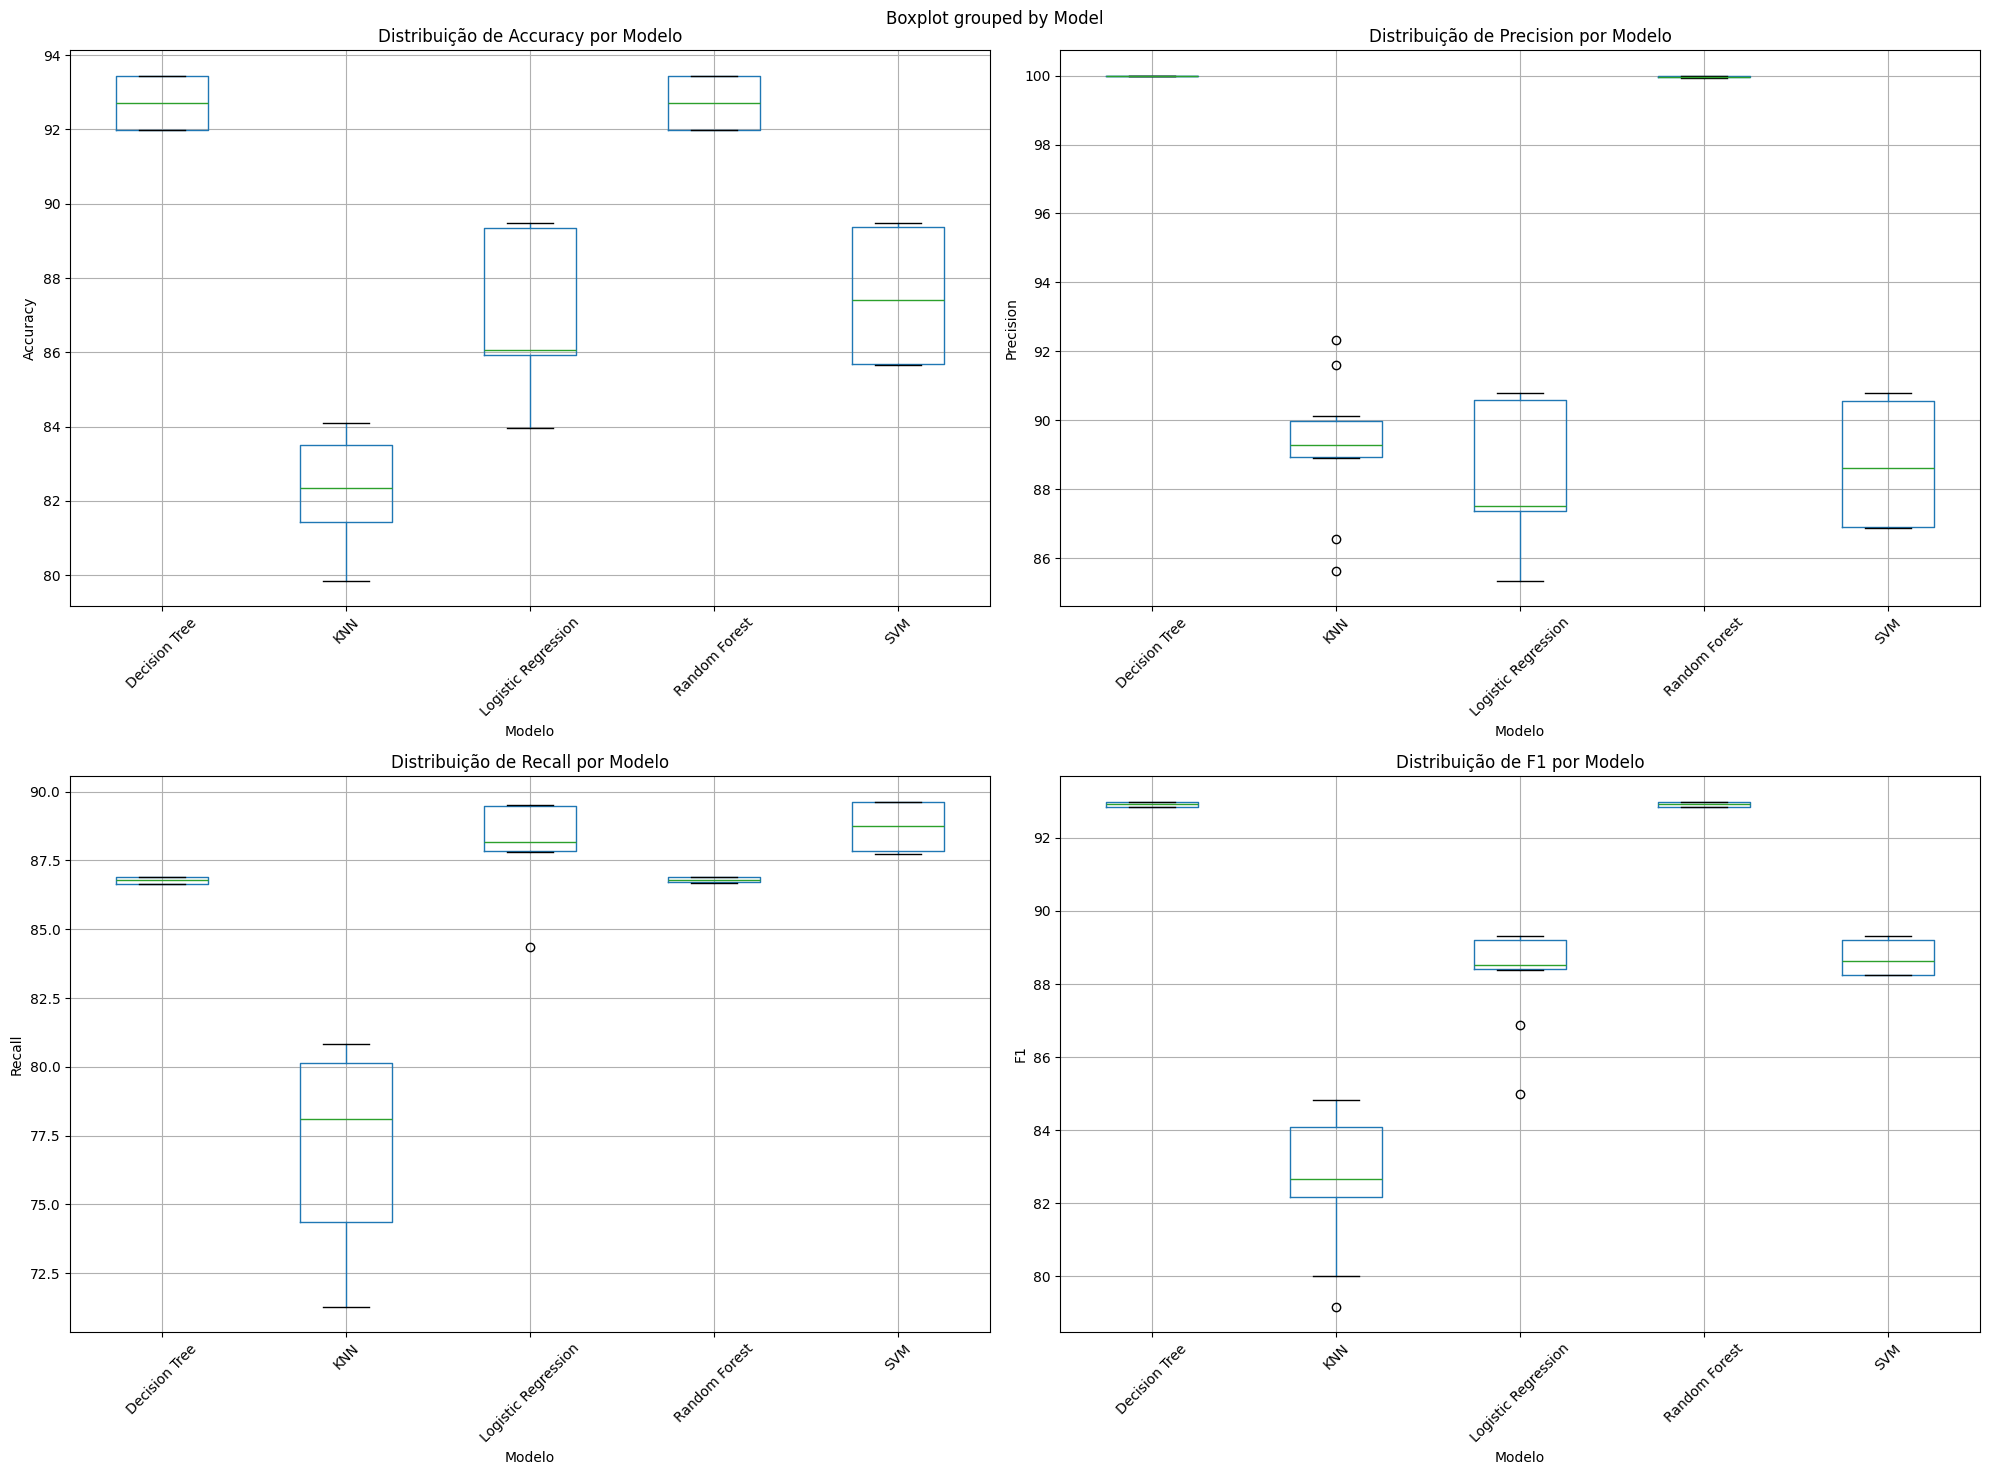

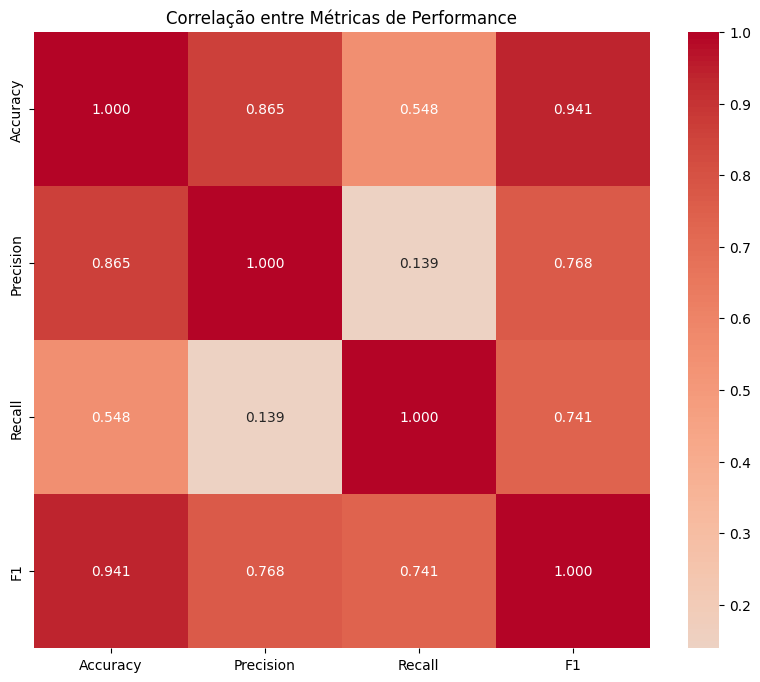

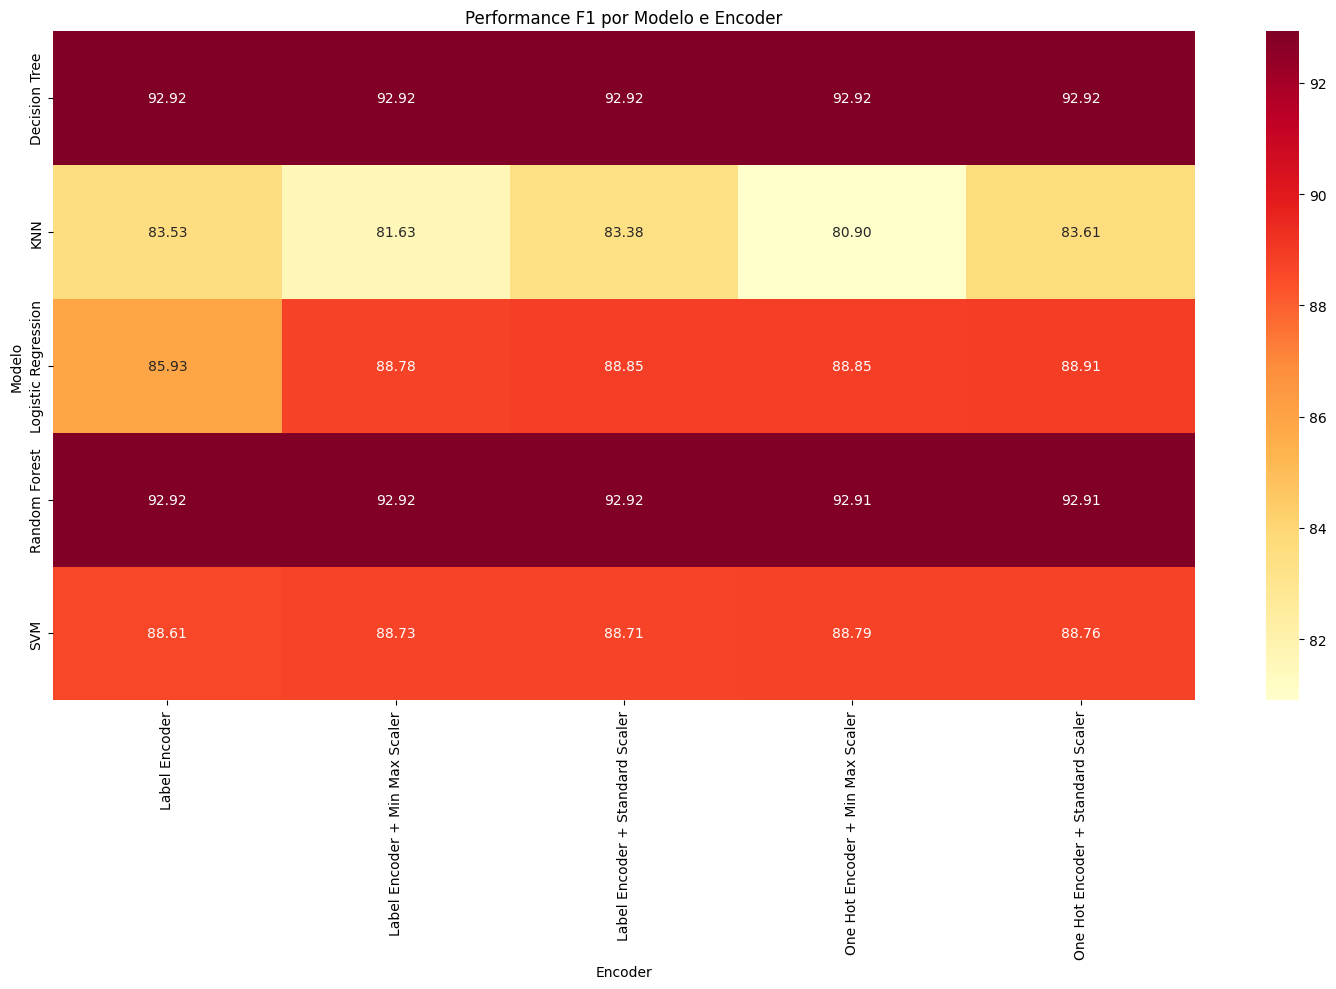

<Figure size 1500x800 with 0 Axes>

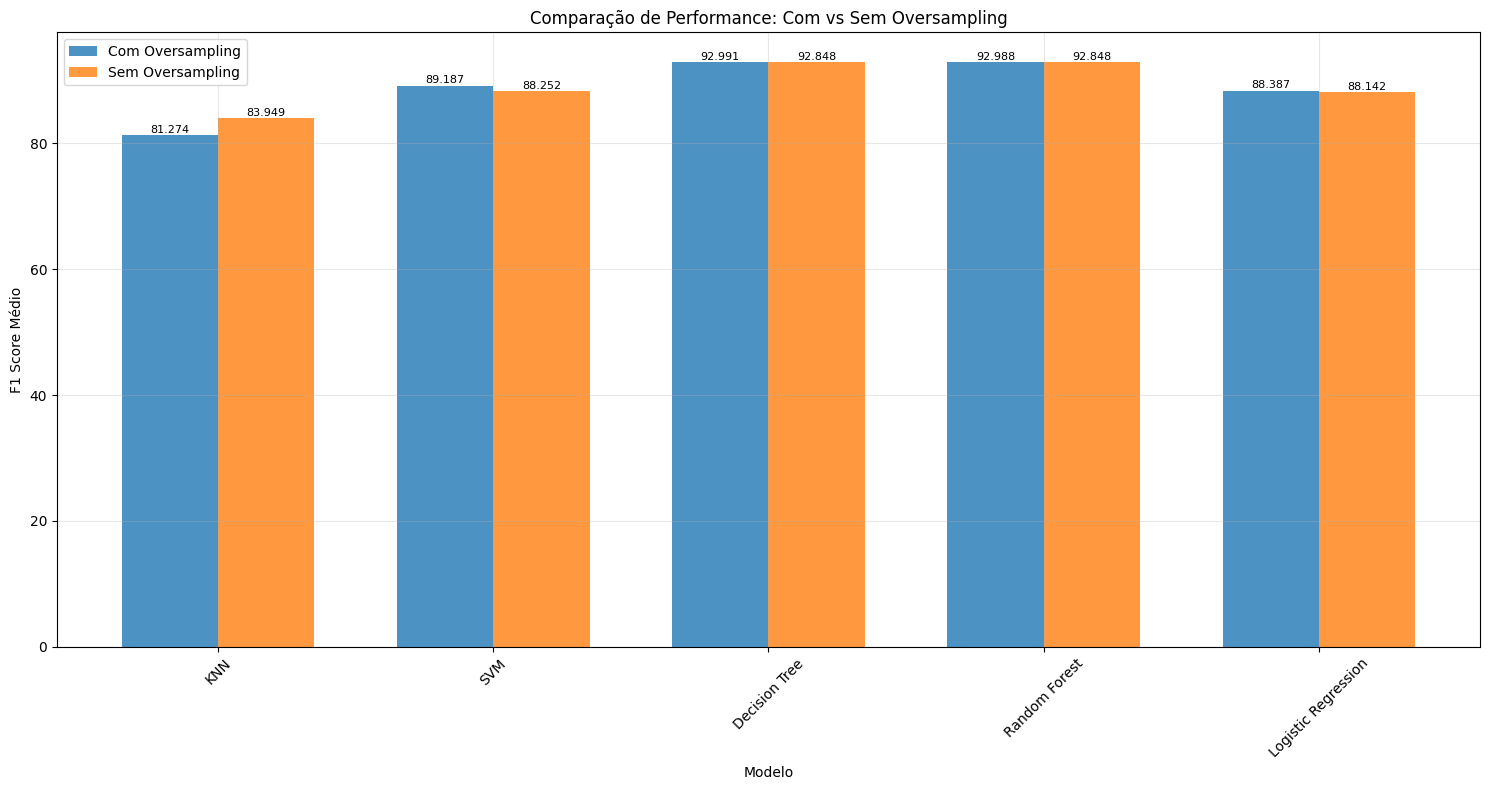

Visualizações criadas com sucesso!


In [15]:
# 13. VISUALIZAÇÕES DOS RESULTADOS

print("13.1 - Criando visualizações dos resultados...")

# Configurando o estilo dos gráficos
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Boxplot das métricas por modelo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    results_df.boxplot(column=metric, by='Model', ax=ax)
    ax.set_title(f'Distribuição de {metric} por Modelo')
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Heatmap de correlação entre métricas
plt.figure(figsize=(10, 8))
correlation_matrix = results_df[['Accuracy', 'Precision', 'Recall', 'F1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlação entre Métricas de Performance')
plt.show()

# 3. Comparação de modelos por encoder
plt.figure(figsize=(15, 10))

# Agrupando por modelo e encoder
model_encoder_performance = results_df.groupby(['Model', 'Encoder'])['F1'].mean().unstack()

# Criando heatmap
sns.heatmap(model_encoder_performance, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Performance F1 por Modelo e Encoder')
plt.xlabel('Encoder')
plt.ylabel('Modelo')
plt.tight_layout()
plt.show()

# 4. Comparação com e sem oversampling
plt.figure(figsize=(15, 8))

# Separando dados com e sem oversampling
with_oversampling = results_df[results_df['Oversampling'] == True]
without_oversampling = results_df[results_df['Oversampling'] == False]

# Plotando comparação
models = results_df['Model'].unique()
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))

# Calculando médias
with_os_means = [with_oversampling[with_oversampling['Model'] == model]['F1'].mean() for model in models]
without_os_means = [without_oversampling[without_oversampling['Model'] == model]['F1'].mean() for model in models]

bars1 = ax.bar(x - width/2, with_os_means, width, label='Com Oversampling', alpha=0.8)
bars2 = ax.bar(x + width/2, without_os_means, width, label='Sem Oversampling', alpha=0.8)

ax.set_xlabel('Modelo')
ax.set_ylabel('F1 Score Médio')
ax.set_title('Comparação de Performance: Com vs Sem Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Adicionando valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("Visualizações criadas com sucesso!")


In [16]:
# 14. RELATÓRIO FINAL E CONCLUSÕES

print("14.1 - Relatório Final dos Resultados")
print("=" * 80)

# Estatísticas gerais
print(f"\nTotal de experimentos realizados: {len(results_df)}")
print(f"Modelos testados: {len(results_df['Model'].unique())}")
print(f"Combinações de encoder testadas: {len(results_df['Encoder'].unique())}")

# Análise por modelo
print("\n14.2 - Performance média por modelo:")
model_performance = results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1']].mean()
print(model_performance.round(3))

# Análise por encoder
print("\n14.3 - Performance média por encoder:")
encoder_performance = results_df.groupby('Encoder')[['Accuracy', 'Precision', 'Recall', 'F1']].mean()
print(encoder_performance.round(3))

# Análise do impacto do oversampling
print("\n14.4 - Impacto do Oversampling:")
oversampling_analysis = results_df.groupby('Oversampling')[['Accuracy', 'Precision', 'Recall', 'F1']].mean()
print(oversampling_analysis.round(3))

# Top 5 melhores resultados
print("\n14.5 - Top 5 melhores resultados (F1 Score):")
top_5 = results_df.nlargest(5, 'F1')[['Model', 'Encoder', 'Oversampling', 'Accuracy', 'Precision', 'Recall', 'F1']]
print(top_5.round(3))

# Análise de variância
print("\n14.6 - Análise de variância dos resultados:")
variance_analysis = results_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1']].std()
print("Desvio padrão por modelo:")
print(variance_analysis.round(3))

# Conclusões
print("\n14.7 - CONCLUSÕES:")
print("-" * 50)

# Melhor modelo geral
best_overall = results_df.loc[results_df['F1'].idxmax()]
print(f"• Melhor modelo geral: {best_overall['Model']}")
print(f"• Melhor encoder: {best_overall['Encoder']}")
print(f"• Oversampling: {'Sim' if best_overall['Oversampling'] else 'Não'}")
print(f"• F1 Score: {best_overall['F1']:.3f}")

# Análise de estabilidade
model_std = results_df.groupby('Model')['F1'].std()
most_stable = model_std.idxmin()
print(f"\n• Modelo mais estável: {most_stable} (std: {model_std[most_stable]:.3f})")

# Impacto do oversampling
f1_with_os = results_df[results_df['Oversampling'] == True]['F1'].mean()
f1_without_os = results_df[results_df['Oversampling'] == False]['F1'].mean()
os_impact = f1_with_os - f1_without_os
print(f"\n• Impacto do oversampling: {os_impact:+.3f} (F1 médio)")

if os_impact > 0:
    print("  → Oversampling melhora a performance geral")
else:
    print("  → Oversampling não melhora a performance geral")

# Recomendações
print(f"\n14.8 - RECOMENDAÇÕES:")
print("-" * 30)
print("• Para classificação de diabetes, recomenda-se:")
print(f"  - Modelo: {best_overall['Model']}")
print(f"  - Pré-processamento: {best_overall['Encoder']}")
print(f"  - Oversampling: {'Sim' if best_overall['Oversampling'] else 'Não'}")
print(f"  - Performance esperada: F1 = {best_overall['F1']:.1f}%")

print("\n" + "=" * 80)
print("ANÁLISE CONCLUÍDA COM SUCESSO!")
print("=" * 80)


14.1 - Relatório Final dos Resultados

Total de experimentos realizados: 50
Modelos testados: 5
Combinações de encoder testadas: 5

14.2 - Performance média por modelo:
                     Accuracy  Precision  Recall      F1
Model                                                   
Decision Tree          92.720    100.000  86.775  92.919
KNN                    82.290     89.230  77.036  82.612
Logistic Regression    87.063     88.344  88.219  88.265
Random Forest          92.717     99.969  86.796  92.918
SVM                    87.516     88.742  88.739  88.719

14.3 - Performance média por encoder:
                                   Accuracy  Precision  Recall      F1
Encoder                                                               
Label Encoder                        88.098     92.745  85.374  88.784
Label Encoder + Min Max Scaler       88.375     93.146  85.445  88.997
Label Encoder + Standard Scaler      88.750     93.595  85.721  89.355
One Hot Encoder + Min Max Scaler     8